In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df=pd.read_excel("HealthCareData.xlsx")

In [3]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [4]:
df["Blood pressure (mmhg)"].value_counts()

,count
Blood pressure (mmhg),
110/70,135
130/90,74
130/80,68
140/90,56
120/80,45
112/70,40
140/80,37
140/100,37
130/70,34


In [5]:
df.shape

(950, 42)

In [6]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()

,count
Predicted Value(Out Come-Patient suffering from liver cirrosis or not),
YES,876
no,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

In [8]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
  print(col)

Gender
Place(location where the patient lives)
Type of alcohol consumed
Hepatitis B infection
Hepatitis C infection
Diabetes Result
Blood pressure (mmhg)
Obesity
Family history of cirrhosis/ hereditary
TG
LDL
Total Bilirubin    (mg/dl)
A/G Ratio
USG Abdomen (diffuse liver or  not)
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)


In [11]:
print(df["TG"].head(3))
print(df["LDL"].head(3))
print(df["Total Bilirubin    (mg/dl)"].head(3))

0    115
1    115
2    115
Name: TG, dtype: object
0    120
1    120
2    120
Name: LDL, dtype: object
0    7
1    7
2    7
Name: Total Bilirubin    (mg/dl), dtype: object


In [12]:
print(df["TG"].value_counts())
print(df["LDL"].value_counts())
print(df["Total Bilirubin    (mg/dl)"].value_counts())

TG
160       65
156       42
120       37
184       32
180       30
190       28
170       27
166       19
186       18
172       18
174       17
136       14
168       13
146       13
118       11
140       11
150       11
188       10
197       10
130       10
151       10
86         9
115        9
162        9
177        9
173        9
100        9
195        9
178        9
176        8
206        8
171        8
106        8
189        8
200        8
192        8
164        8
144        7
139        1
130LDL     1
Name: count, dtype: int64
LDL
120    82
110    58
108    56
96     50
105    40
104    33
79     32
90     18
116    18
98     17
85     17
109    14
129    13
80     11
115    10
94     10
88     10
136    10
122    10
65      9
180     9
100     9
91      9
49      9
99      9
200     9
86      8
106     8
111     1
220     1
HDL     1
Name: count, dtype: int64
Total Bilirubin    (mg/dl)
7       77
4.8     48
6       40
4.2     40
8.4     39
6.8     39
5.6     38
4      

In [13]:
df = df[df['TG'] != '130LDL']
df = df[df['LDL'] != 'HDL']
df = df[df['Total Bilirubin    (mg/dl)'] != 'o.4']

In [14]:
df["TG"] = df["TG"].astype(float)
df["LDL"] = df["LDL"].astype(float)
df["Total Bilirubin    (mg/dl)"] = df["Total Bilirubin    (mg/dl)"].astype(float)

In [15]:
df["Blood pressure (mmhg)"].value_counts()

,count
Blood pressure (mmhg),
110/70,135
130/90,74
130/80,66
140/90,56
120/80,45
112/70,40
140/80,37
140/100,37
130/70,34


In [16]:
df["Blood pressure (mmhg)"] = df["Blood pressure (mmhg)"].str.replace('/', '/').str.split('/').apply(lambda x: float(x[0]) / float(x[1]))

In [17]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

,count
Quantity of alcohol consumption (quarters/day),
2,520
3,198
1,158
4,54
180,16
5,1


In [18]:
df["Quantity of alcohol consumption (quarters/day)"] = df["Quantity of alcohol consumption (quarters/day)"].replace(180, 5)

In [19]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

,count
Quantity of alcohol consumption (quarters/day),
2,520
3,198
1,158
4,54
5,17


In [20]:
df["Platelet Count  (lakhs/mm)"].value_counts()

,count
Platelet Count (lakhs/mm),
1.200,100
1.500,84
1.800,68
1.000,51
1.100,49
1.700,46
1.400,41
1.600,37
1.900,29


In [21]:
df = df[df["Platelet Count  (lakhs/mm)"] != 90000.000]

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-22-2846540328.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),133
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [23]:
df["TG"] = df["TG"].astype(int)
df["LDL"] = df["LDL"].astype(int)

In [24]:
df["A/G Ratio"].value_counts()

,count
A/G Ratio,
0.75,86
01:01:00,59
01:03:00,32
01:02:00,28
1900-01-01 00:00:00,24
02:01:00,21
0.6,20
1.214,20
1.5:1,19


In [25]:
df["Albumin   (g/dl)"].value_counts()

,count
Albumin (g/dl),
2.000000,148
3.000000,136
2.500000,69
3.200000,57
1.200000,51
2.100000,48
1.800000,38
2.800000,37
1.600000,30


In [26]:
df=df[df["Albumin   (g/dl)"]!=22.0]

In [28]:
df["Globulin  (g/dl)"].value_counts()

,count
Globulin (g/dl),
4.000000,127
2.000000,118
3.000000,88
2.800000,65
2.500000,51
3.100000,47
3.500000,41
4.300000,38
1.000000,30


In [29]:
df=df[df["Globulin  (g/dl)"]!=30.0]

In [30]:
df["A/G Ratio"] = round(df["Albumin   (g/dl)"]/df["Globulin  (g/dl)"],2)

In [31]:
df["A/G Ratio"].value_counts()

,count
A/G Ratio,
1.00,99
0.75,87
0.67,49
0.50,30
0.43,30
0.61,29
0.86,24
0.32,20
1.50,20


In [32]:
df["A/G Ratio"]=df["A/G Ratio"].astype(float)

In [33]:
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)

/tmp/ipython-input-33-3312148095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)


In [34]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
for column, count in null_columns.items():
  print(f"{column}: {count}")

Place(location where the patient lives): 133
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not): 54


In [35]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           723
female         194
female          10
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
 ocun      1
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor     468
both               282
branded liquor     181
 branded liquor      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    779
Positive    152
positive      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    796
Positive    134
positive      2
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     299
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     396
Name: count, dtype: int64
-------------------------

In [36]:
df = df[df['Place(location where the patient lives)'] != ' ocun']

In [37]:
df["Gender"].replace("female ","female",inplace=True)

/tmp/ipython-input-37-2254492926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace("female ","female",inplace=True)


In [38]:
df["Gender"].value_counts()

,count
Gender,
male,722
female,204
transgender,5


In [39]:
df["Type of alcohol consumed"].replace(" branded liquor","branded liquor",inplace=True)

/tmp/ipython-input-39-3008806420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type of alcohol consumed"].replace(" branded liquor","branded liquor",inplace=True)


In [40]:
df["Type of alcohol consumed"].value_counts()

,count
Type of alcohol consumed,
country liquor,468
both,281
branded liquor,182


In [42]:
df["Hepatitis B infection"].replace("Positive","positive",inplace=True)
df["Hepatitis C infection"].replace("Positive","positive",inplace=True)

/tmp/ipython-input-42-4237519108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hepatitis B infection"].replace("Positive","positive",inplace=True)
/tmp/ipython-input-42-4237519108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [43]:
df["Hepatitis B infection"].value_counts()

,count
Hepatitis B infection,
negative,778
positive,153


In [44]:
df["Hepatitis C infection"].value_counts()

,count
Hepatitis C infection,
negative,795
positive,136


In [45]:
df["Family history of cirrhosis/ hereditary"].replace("husband","yes",inplace=True)
df["Family history of cirrhosis/ hereditary"].value_counts()

/tmp/ipython-input-45-3292381966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Family history of cirrhosis/ hereditary"].replace("husband","yes",inplace=True)


,count
Family history of cirrhosis/ hereditary,
no,853
yes,78


In [46]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].replace("YES","yes",inplace=True)
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()

/tmp/ipython-input-46-903636583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].replace("YES","yes",inplace=True)


,count
Predicted Value(Out Come-Patient suffering from liver cirrosis or not),
yes,859
no,18


In [47]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           722
female         204
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor    468
both              281
branded liquor    182
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    778
positive    153
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    795
positive    136
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     298
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     395
Name: count, dtype: int64
--------------------------------------------------
Family history of cirrhosis/ hereditary
no     853
yes     78
Na

In [48]:
df.drop(columns=["Place(location where the patient lives)","S.NO"],inplace=True)

In [49]:
df.rename(columns={"Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)": "Outcome"}, inplace=True)

In [50]:
df.columns

Index(['Age', 'Gender', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='o

In [51]:
df["Outcome"].value_counts()

,count
Outcome,
yes,859
no,18


In [52]:
df["Outcome"].isnull().sum()

np.int64(54)

In [53]:
df["Outcome"].fillna("yes", inplace=True)

/tmp/ipython-input-53-2024770314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Outcome"].fillna("yes", inplace=True)


In [54]:
df.isnull()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


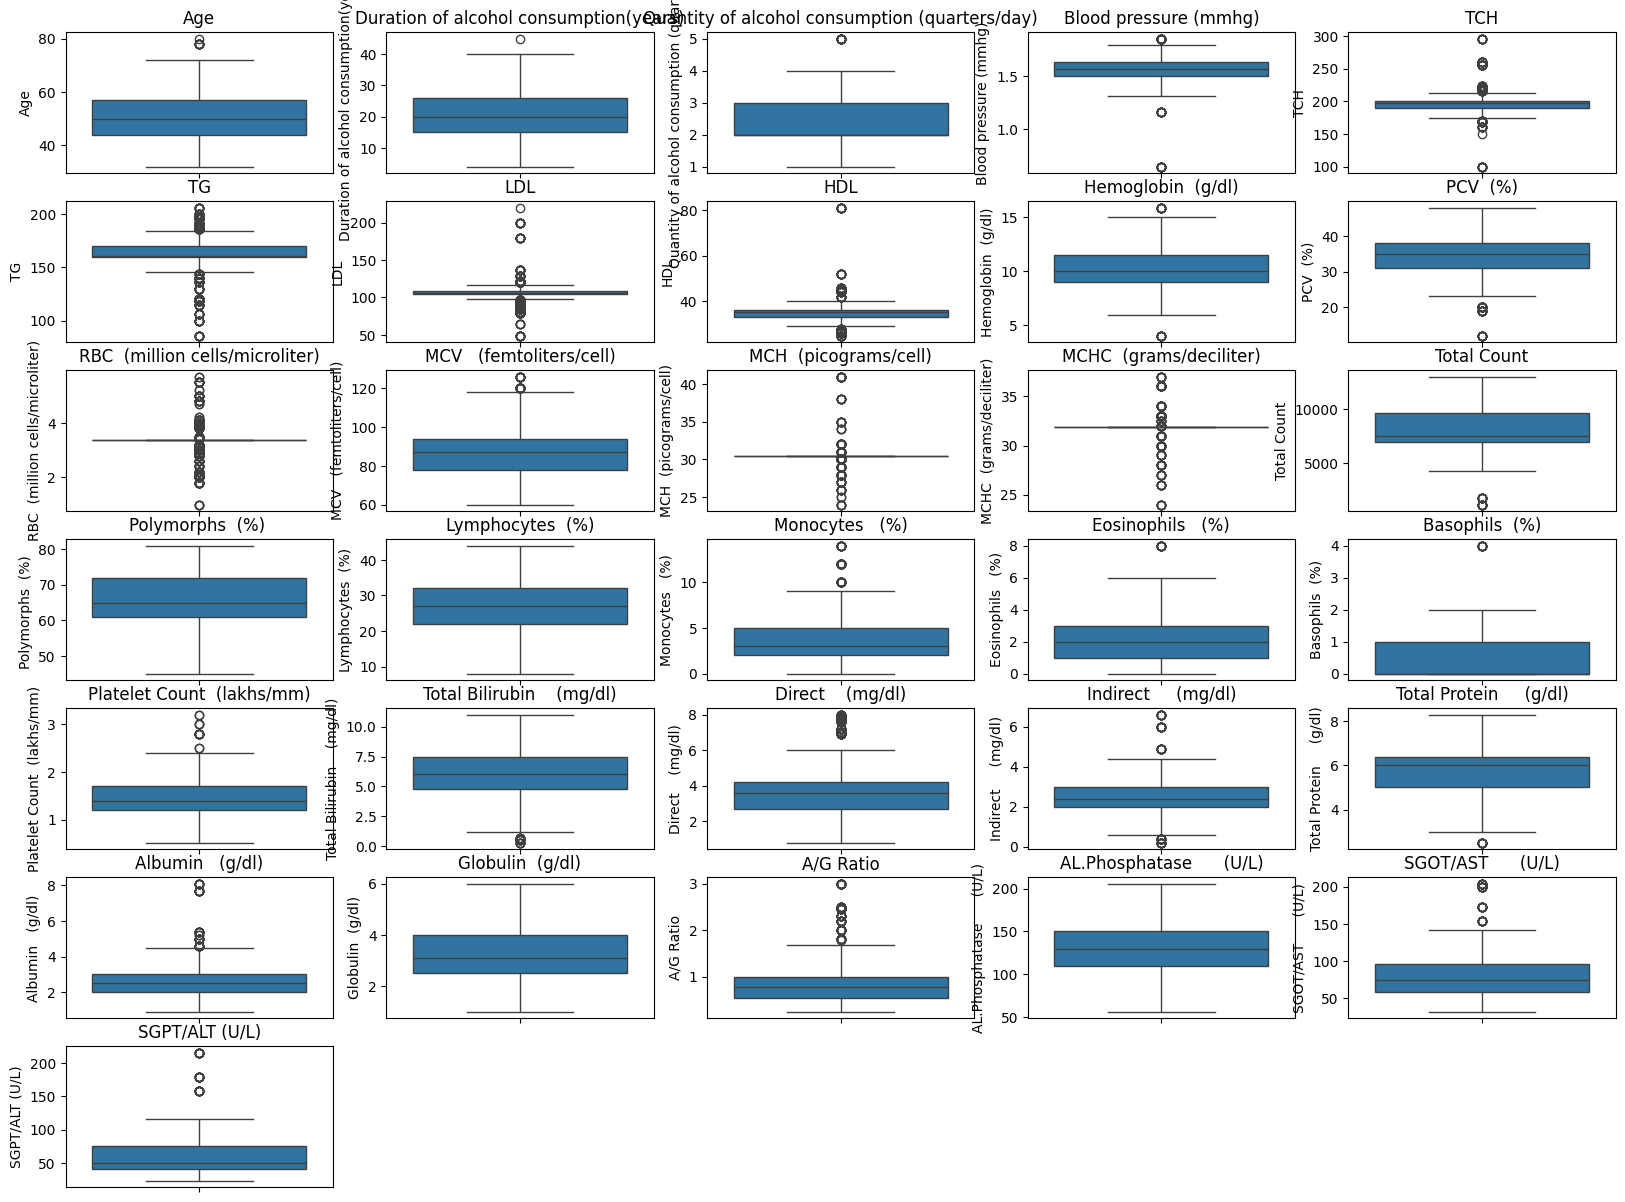

In [55]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

In [56]:
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound, df[col]))

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
remove_outliers(df, numerical_columns)

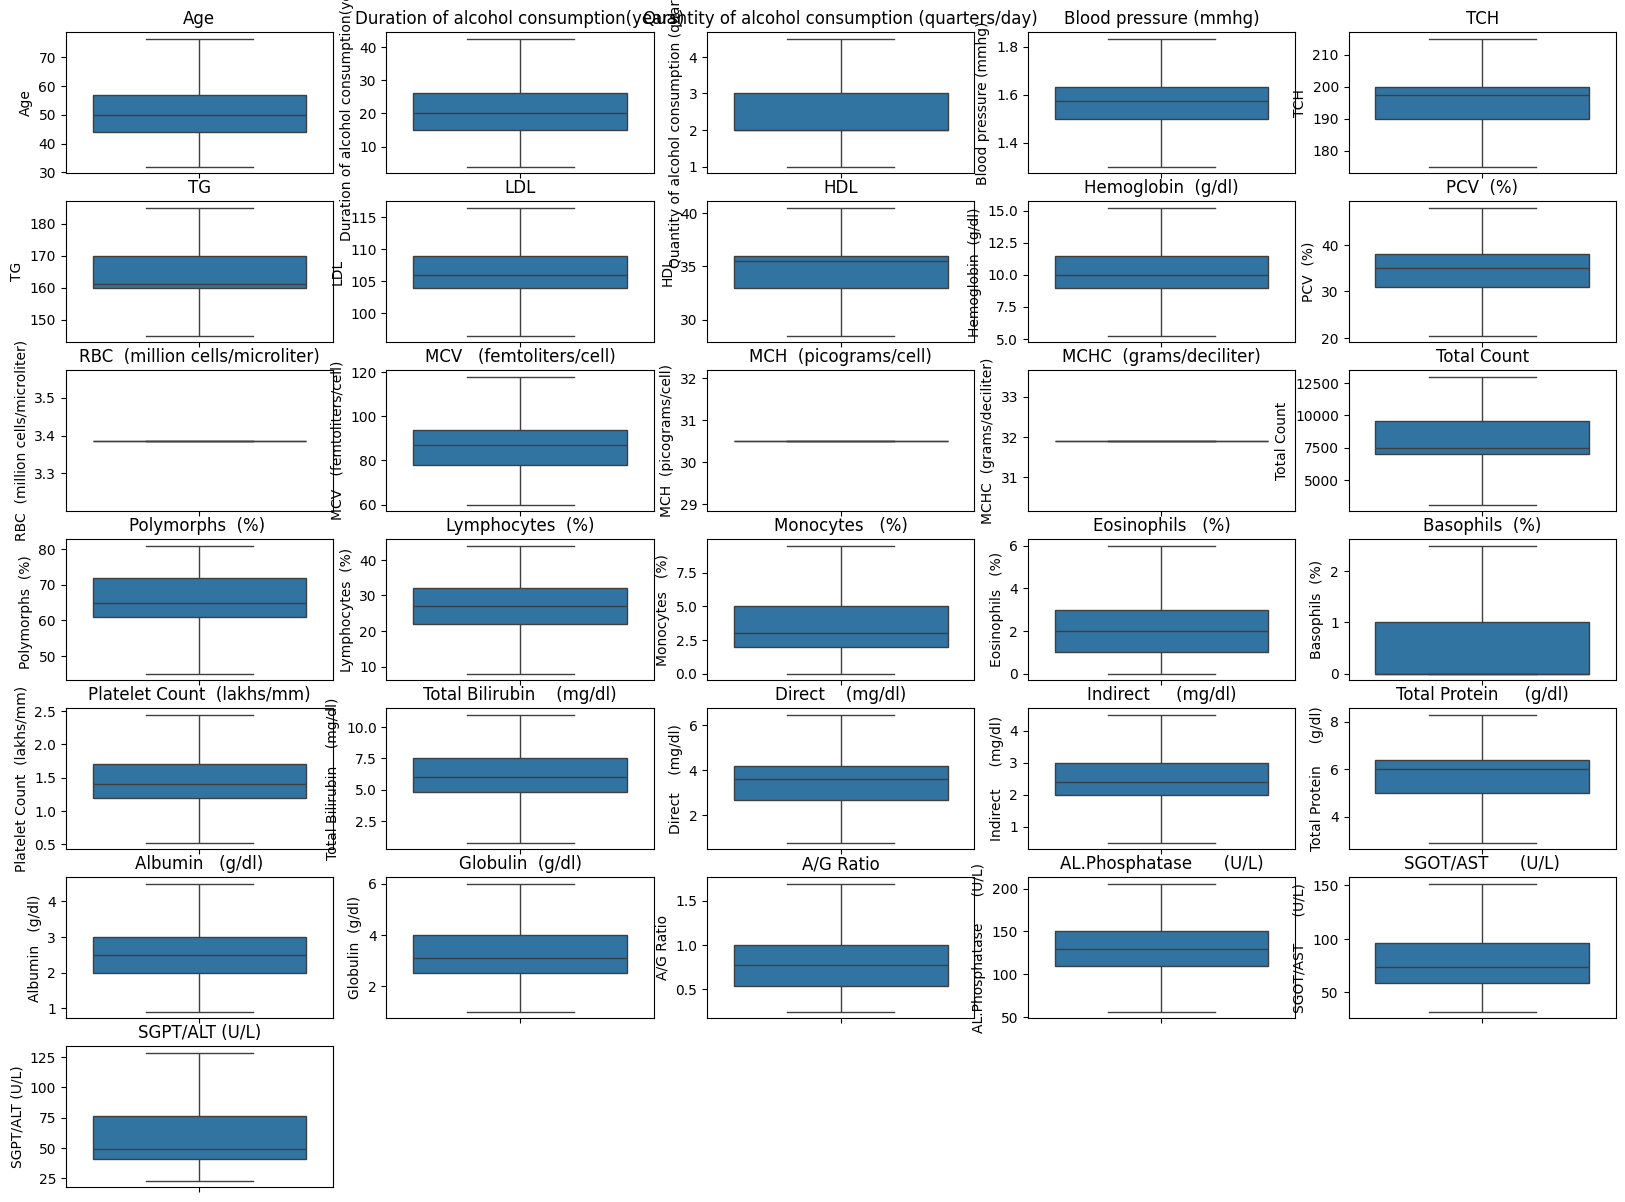

In [57]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

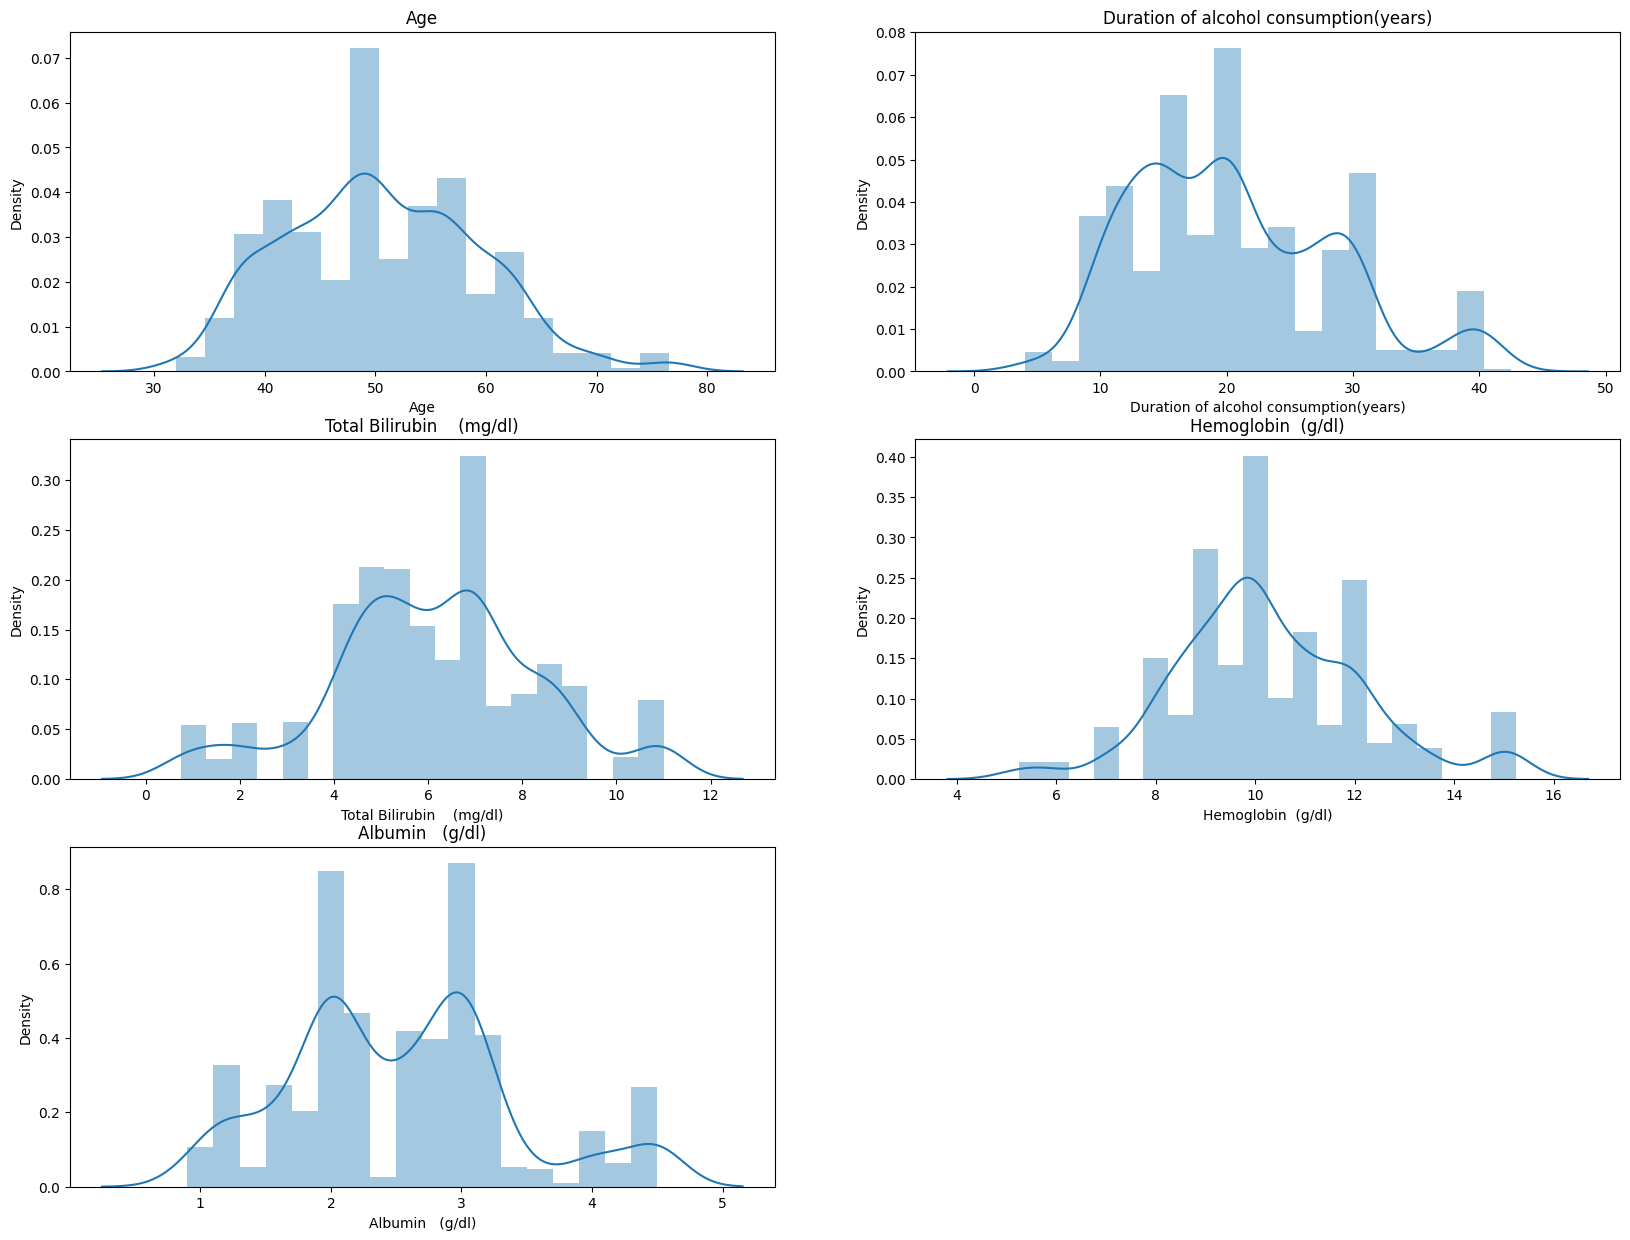

In [58]:
l=['Age','Duration of alcohol consumption(years)','Total Bilirubin    (mg/dl)','Hemoglobin  (g/dl)','Albumin   (g/dl)']

plt.figure(figsize=(20, 15))

for i, col in enumerate(l):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df[col])
    plt.title(col)

plt.show()

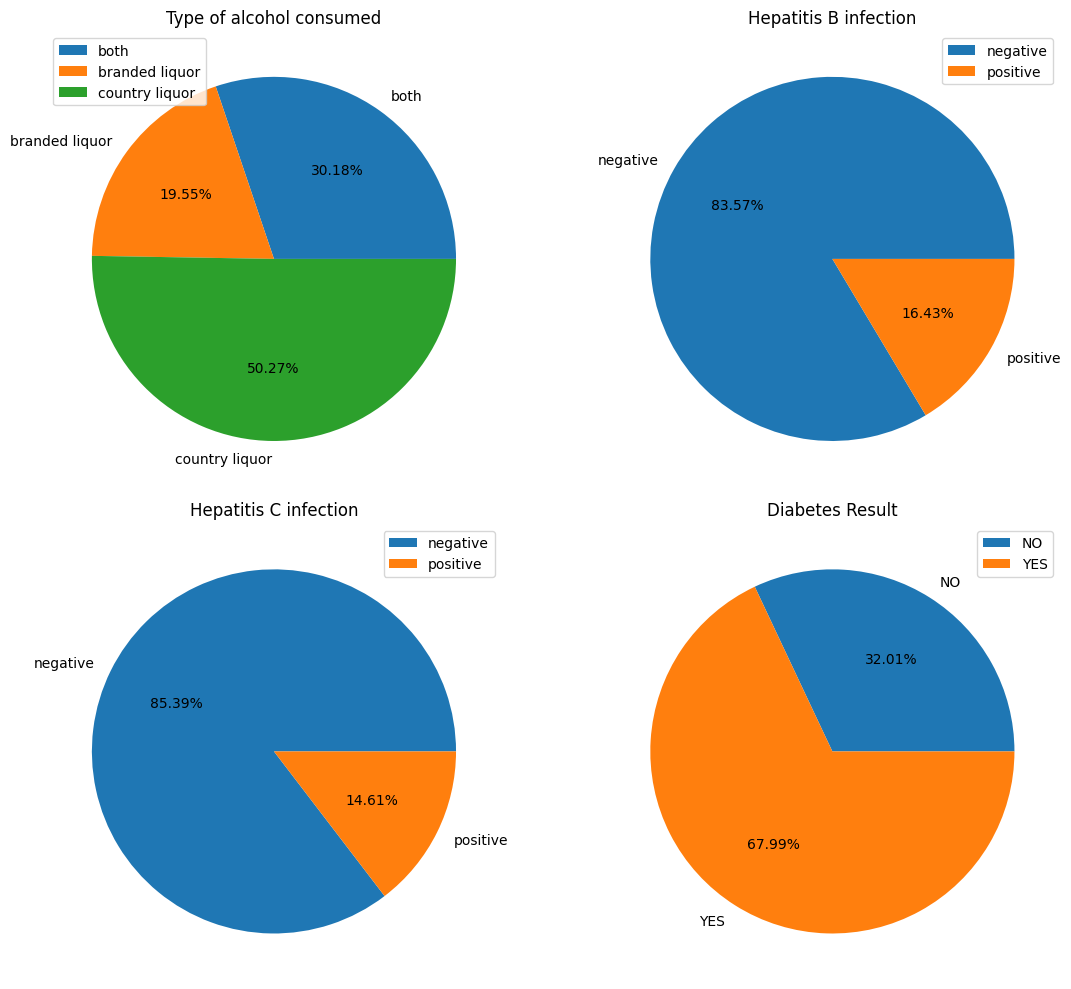

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Type of alcohol consumed
df.groupby("Type of alcohol consumed").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 0], legend=True)
axes[0, 0].set_title("Type of alcohol consumed")

# Hepatitis B infection
df.groupby("Hepatitis B infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 1], legend=True)
axes[0, 1].set_title("Hepatitis B infection")

# Hepatitis C infection
df.groupby("Hepatitis C infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 0], legend=True)
axes[1, 0].set_title("Hepatitis C infection")

# Diabetes Result
df.groupby("Diabetes Result").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 1], legend=True)
axes[1, 1].set_title("Diabetes Result")



plt.tight_layout()
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

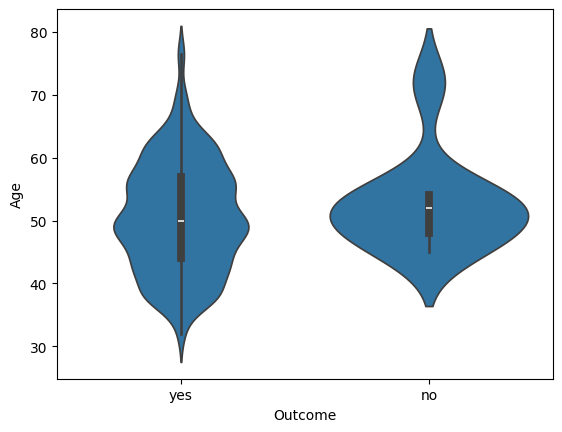

In [60]:
sns.violinplot(y=df["Age"],x=df["Outcome"])

<Axes: xlabel='Outcome', ylabel='Total Protein     (g/dl)'>

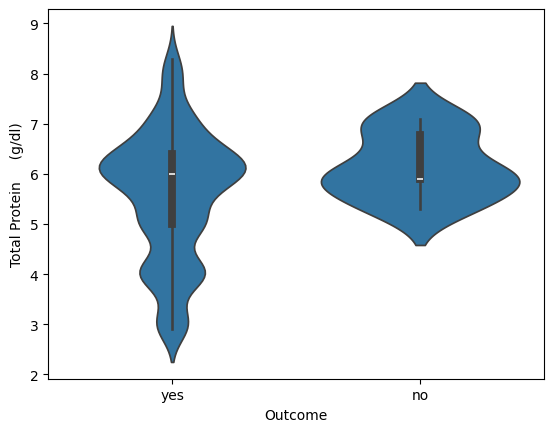

In [61]:
sns.violinplot(y=df["Total Protein     (g/dl)"],x=df["Outcome"])

<Axes: xlabel='Outcome', ylabel='Hemoglobin  (g/dl)'>

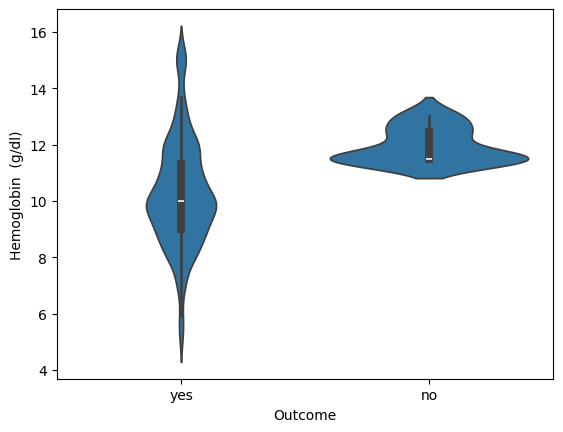

In [62]:
sns.violinplot(y=df["Hemoglobin  (g/dl)"],x=df["Outcome"])

<Axes: xlabel='Gender', ylabel='count'>

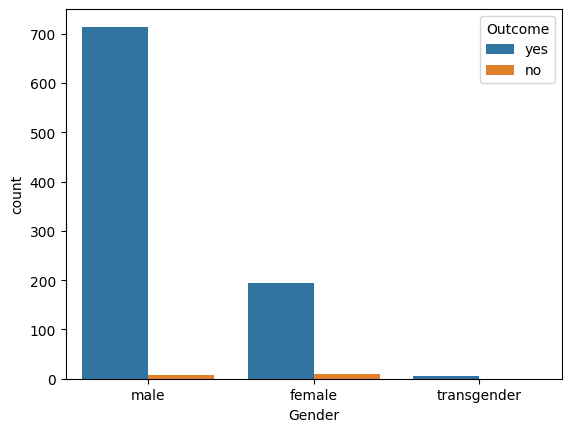

In [63]:
sns.countplot(data=df,x="Gender",hue="Outcome")

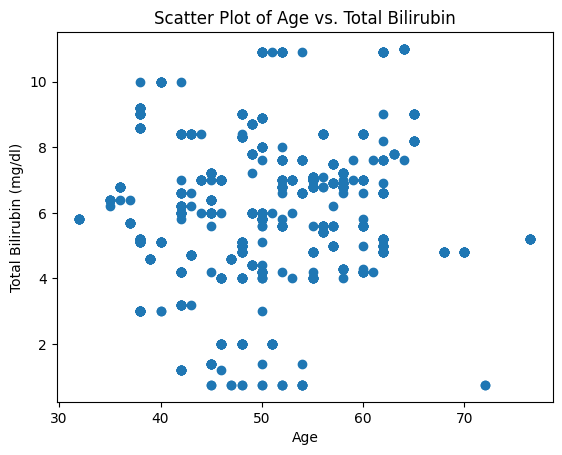

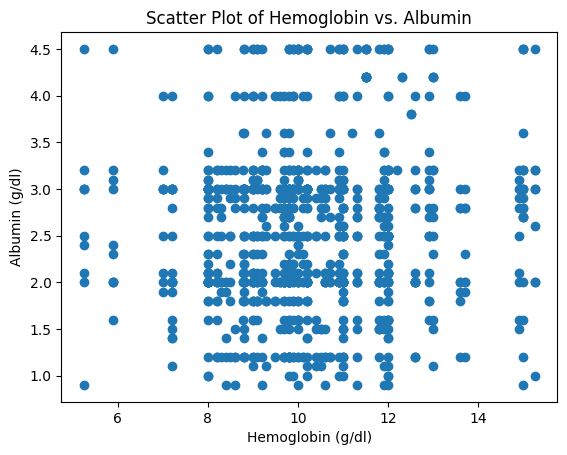

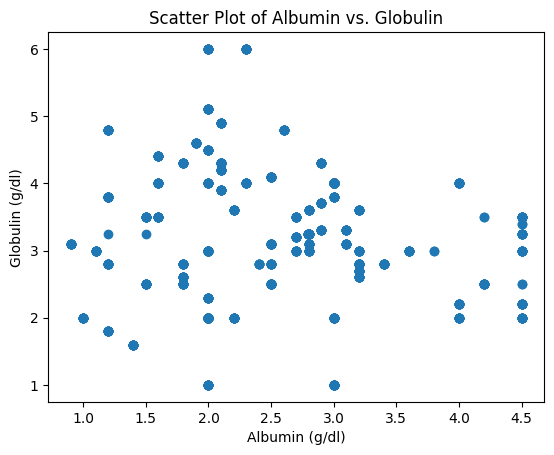

In [64]:
import matplotlib.pyplot as plt
# Scatter plot of Age vs. Total Bilirubin
plt.scatter(df["Age"], df["Total Bilirubin    (mg/dl)"])
plt.xlabel("Age")
plt.ylabel("Total Bilirubin (mg/dl)")
plt.title("Scatter Plot of Age vs. Total Bilirubin")
plt.show()

# Scatter plot of Hemoglobin vs. Albumin
plt.scatter(df["Hemoglobin  (g/dl)"], df["Albumin   (g/dl)"])
plt.xlabel("Hemoglobin (g/dl)")
plt.ylabel("Albumin (g/dl)")
plt.title("Scatter Plot of Hemoglobin vs. Albumin")
plt.show()

# Scatter plot of Albumin vs. Globulin
plt.scatter(df["Albumin   (g/dl)"], df["Globulin  (g/dl)"])
plt.xlabel("Albumin (g/dl)")
plt.ylabel("Globulin (g/dl)")
plt.title("Scatter Plot of Albumin vs. Globulin")
plt.show()

In [65]:
df1=df.copy()

In [66]:
df1.drop(columns=["Gender",'TCH','TG','LDL','RBC  (million cells/microliter)','MCH  (picograms/cell)','MCHC  (grams/deciliter)','Total Count','Eosinophils   (%)','Globulin  (g/dl)'],inplace=True)

In [67]:
df1.corr(numeric_only=True)

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),HDL,Hemoglobin (g/dl),PCV (%),MCV (femtoliters/cell),Polymorphs (%),Lymphocytes (%),...,Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
Age,1.000000,0.504880,-0.014838,-0.051067,0.027021,0.005643,0.097591,0.044536,0.102051,-0.051998,...,0.071371,0.111111,0.056810,0.241744,0.061647,-0.025472,-0.072670,0.117445,0.051609,0.104097
Duration of alcohol consumption(years),0.504880,1.000000,0.013511,0.052442,0.102488,-0.066525,-0.003214,0.275167,0.263651,-0.363089,...,-0.093403,-0.180130,-0.258064,0.098370,-0.127660,-0.266224,-0.150173,0.312834,0.305667,0.220968
Quantity of alcohol consumption (quarters/day),-0.014838,0.013511,1.000000,-0.235936,0.087929,-0.028515,-0.106242,-0.003966,-0.001482,0.102467,...,0.111797,-0.058668,-0.070019,0.068496,-0.176093,-0.004464,0.128809,-0.094731,-0.062926,-0.080740
Blood pressure (mmhg),-0.051067,0.052442,-0.235936,1.000000,-0.047842,-0.012078,0.018328,0.071560,0.248554,0.012415,...,0.130282,-0.076937,-0.112301,0.029902,-0.027565,0.105403,0.117146,0.047766,0.086927,-0.055243
HDL,0.027021,0.102488,0.087929,-0.047842,1.000000,-0.031386,-0.042923,-0.003529,-0.170594,-0.014607,...,-0.145335,0.038456,-0.001202,0.038557,0.038159,-0.181625,-0.173873,-0.143857,0.071819,0.064580
Hemoglobin (g/dl),0.005643,-0.066525,-0.028515,-0.012078,-0.031386,1.000000,-0.006746,-0.026800,-0.023490,0.010444,...,0.021393,-0.046225,0.015173,-0.019270,0.036043,0.069044,0.040801,-0.009615,-0.009007,-0.046745
PCV (%),0.097591,-0.003214,-0.106242,0.018328,-0.042923,-0.006746,1.000000,-0.215279,-0.061485,0.099383,...,0.260573,0.006346,0.124041,-0.147214,0.310499,0.348276,0.120090,0.003518,-0.152265,-0.186766
MCV (femtoliters/cell),0.044536,0.275167,-0.003966,0.071560,-0.003529,-0.026800,-0.215279,1.000000,0.096923,-0.223638,...,0.029725,-0.301073,-0.408698,-0.007832,-0.193946,-0.129655,0.021159,-0.043319,0.278110,0.235697
Polymorphs (%),0.102051,0.263651,-0.001482,0.248554,-0.170594,-0.023490,-0.061485,0.096923,1.000000,-0.479791,...,-0.056582,0.096292,-0.048245,0.163071,-0.079210,-0.153799,-0.044456,0.047370,-0.100152,0.067920
Lymphocytes (%),-0.051998,-0.363089,0.102467,0.012415,-0.014607,0.010444,0.099383,-0.223638,-0.479791,1.000000,...,0.382883,0.087118,0.220090,-0.092456,0.180241,0.387191,0.197401,0.006548,-0.215464,-0.283448


<Axes: >

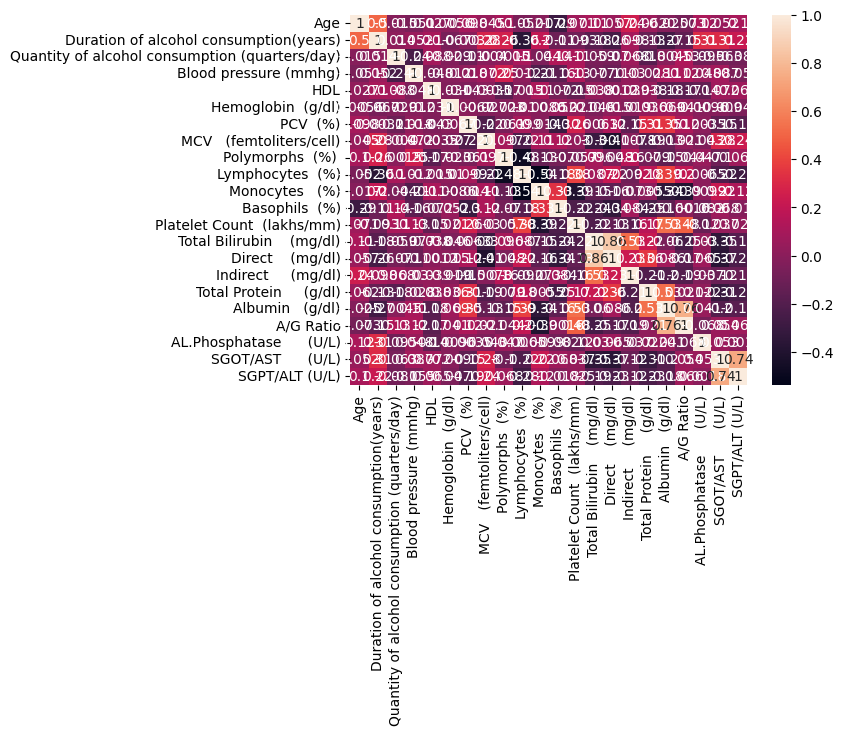

In [68]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

In [69]:
correlation_matrix = df1.corr(numeric_only=True)
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2] * 100:.2f}%")

Total Bilirubin    (mg/dl) and Direct    (mg/dl): 86.07%


In [70]:
df.describe()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,...,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,50.588614,20.552632,2.195489,1.567364,195.816696,163.541353,106.040279,34.914618,10.266305,33.900873,...,6.118582,3.704834,2.423035,5.595907,2.529510,3.225369,0.855725,132.292207,80.383459,59.821697
std,8.747285,7.978730,0.817103,0.119739,10.909775,11.975295,6.279703,3.262292,1.887182,5.307312,...,2.195534,1.573631,0.937483,1.265447,0.853937,0.995112,0.396936,27.271596,27.019867,25.076247
min,32.000000,4.000000,1.000000,1.300000,175.000000,145.000000,96.500000,28.500000,5.250000,20.500000,...,0.750000,0.800000,0.500000,2.900000,0.900000,1.000000,0.250000,56.000000,32.000000,23.000000
25%,44.000000,15.000000,2.000000,1.500000,190.000000,160.000000,104.000000,33.000000,9.000000,31.000000,...,4.800000,2.700000,2.000000,5.000000,2.000000,2.500000,0.540000,110.000000,59.000000,41.000000
50%,50.000000,20.000000,2.000000,1.571429,197.423932,161.000000,106.000000,35.516464,10.000000,35.000000,...,6.000000,3.600000,2.400000,6.000000,2.500000,3.100000,0.780000,130.000000,74.000000,49.000000
75%,57.000000,26.000000,3.000000,1.633333,200.000000,170.000000,109.000000,36.000000,11.500000,38.000000,...,7.500000,4.200000,3.000000,6.400000,3.000000,4.000000,1.000000,150.000000,96.000000,76.000000
max,76.500000,42.500000,4.500000,1.833333,215.000000,185.000000,116.500000,40.500000,15.250000,48.000000,...,11.000000,6.450000,4.500000,8.300000,4.500000,6.000000,1.690000,206.000000,151.500000,128.500000


In [71]:
df.mean(axis=0,numeric_only=True)

,0
Age,50.588614
Duration of alcohol consumption(years),20.552632
Quantity of alcohol consumption (quarters/day),2.195489
Blood pressure (mmhg),1.567364
TCH,195.816696
TG,163.541353
LDL,106.040279
HDL,34.914618
Hemoglobin (g/dl),10.266305
PCV (%),33.900873


In [72]:
import pandas as pd
import random

# Select rows where Outcome is "NO"
df_no_outcome = df[df["Outcome"] == "no"]

# Check if df_no_outcome is empty and handle it accordingly
if df_no_outcome.empty:
    print("No rows found with 'NO' outcome. Cannot generate synthetic data.")
else:
    # Generate synthetic rows based on existing "NO" outcome rows
    synthetic_rows = []
    num_synthetic_samples = 300  # Number of synthetic samples to generate

    for _ in range(num_synthetic_samples):
        # Randomly select a row from df_no_outcome
        selected_row = df_no_outcome.sample(n=1).iloc[0]

        # Create a new row with random values based on the selected row
        synthetic_row = selected_row.copy()
        for column in df_no_outcome.columns:
            if df_no_outcome[column].dtype in ["int64", "float64"]:
                # Add noise within a 10% range of the selected row's value
                noise_factor = 0.1 * selected_row[column]
                synthetic_row[column] = random.uniform(selected_row[column] - noise_factor, selected_row[column] + noise_factor)
            elif df_no_outcome[column].dtype == "object":
                synthetic_row[column] = random.choice(df_no_outcome[column].unique())

        synthetic_rows.append(synthetic_row)

    # Convert synthetic rows to a DataFrame and append to the original DataFrame
    synthetic_df = pd.DataFrame(synthetic_rows, columns=df_no_outcome.columns)
    df = pd.concat([df, synthetic_df], ignore_index=True)

In [73]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
  if X[i].dtype == 'object':
    X[i] = le.fit_transform(X[i])

In [76]:
y_encoded =(le.fit_transform(y))

In [77]:
X.head()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
0,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
1,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
2,55.0,1,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
3,55.0,1,12.0,2.0,1,0,0,0,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
4,55.0,0,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0


In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0009
Gender: 0.0000
Duration of alcohol consumption(years): 0.1905
Quantity of alcohol consumption (quarters/day): 0.0143
Type of alcohol consumed: 0.0017
Hepatitis B infection: 0.0000
Hepatitis C infection: 0.0000
Diabetes Result: 0.0000
Blood pressure (mmhg): 0.0001
Obesity: 0.0021
Family history of cirrhosis/ hereditary: 0.0008
TCH: 0.0003
TG: 0.0000
LDL: 0.0000
HDL: 0.0000
Hemoglobin  (g/dl): 0.0027
PCV  (%): 0.0025
RBC  (million cells/microliter): 0.0391
MCV   (femtoliters/cell): 0.0000
MCH  (picograms/cell): 0.0269
MCHC  (grams/deciliter): 0.0270
Total Count: 0.0010
Polymorphs  (%) : 0.0096
Lymphocytes  (%): 0.0057
Monocytes   (%): 0.0017
Eosinophils   (%): 0.0005
Basophils  (%): 0.0084
Platelet Count  (lakhs/mm): 0.0163
Total Bilirubin    (mg/dl): 0.1809
Direct    (mg/dl): 0.1386
Indirect     (mg/dl): 0.0073
Total Protein     (g/dl): 0.0035
Albumin   (g/dl): 0.0417
Globulin  (g/dl): 0.0033
A/G Ratio: 0.0698
AL.Phosphatase      (U/L): 0.0208
SGOT/AST      (U/L): 0.0264
SGP

In [79]:
drop_col=["Type of alcohol consumed","Gender","Direct    (mg/dl)","MCH  (picograms/cell)","MCHC  (grams/deciliter)","Obesity","Family history of cirrhosis/ hereditary","TCH","LDL","HDL","MCV   (femtoliters/cell)","Total Count","Monocytes   (%)","Basophils  (%)","SGOT/AST      (U/L)","SGPT/ALT (U/L)","MCHC  (grams/deciliter)","RBC  (million cells/microliter)","Quantity of alcohol consumption (quarters/day): 0.0110","Eosinophils   (%)","TG","Hepatitis B infection","Hepatitis C infection","Duration of alcohol consumption(years)","Total Bilirubin    (mg/dl)"]

In [80]:
for col in drop_col:
  if col in X.columns:
    X.drop(columns=[col],inplace=True)

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0030
Quantity of alcohol consumption (quarters/day): 0.0577
Diabetes Result: 0.0395
Blood pressure (mmhg): 0.0010
Hemoglobin  (g/dl): 0.0175
PCV  (%): 0.0032
Polymorphs  (%) : 0.0283
Lymphocytes  (%): 0.0041
Platelet Count  (lakhs/mm): 0.0783
Indirect     (mg/dl): 0.0156
Total Protein     (g/dl): 0.0134
Albumin   (g/dl): 0.1947
Globulin  (g/dl): 0.0121
A/G Ratio: 0.0926
AL.Phosphatase      (U/L): 0.0283
USG Abdomen (diffuse liver or  not): 0.4107


In [82]:
from sklearn.model_selection import train_test_split, cross_val_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [84]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=0)
X_resampled, y_resampled = os.fit_resample(X_train, y_train)

In [85]:
X_resampled.columns

Index(['Age', 'Quantity of alcohol consumption (quarters/day)',
       'Diabetes Result', 'Blood pressure (mmhg)', 'Hemoglobin  (g/dl)',
       'PCV  (%)', 'Polymorphs  (%) ', 'Lymphocytes  (%)',
       'Platelet Count  (lakhs/mm)', 'Indirect     (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)',
       'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'USG Abdomen (diffuse liver or  not)'],
      dtype='object')

In [86]:
y_resampled_series = pd.Series(y_resampled)

y_resampled_series.value_counts()

,count
0,724
1,724


In [88]:
model = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)
print("Train Accuracy:", accuracy_score(y_resampled, y_pred))

Train Accuracy: 0.9419889502762431


In [89]:
model = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.902834008097166
Confusion Matrix:
[[ 52   6]
 [ 18 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        58
           1       0.97      0.90      0.93       189

    accuracy                           0.90       247
   macro avg       0.85      0.90      0.87       247
weighted avg       0.91      0.90      0.91       247



In [90]:
model = svm.SVC(C=0.1,kernel="rbf")
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.8744939271255061
Confusion Matrix:
[[ 44  14]
 [ 17 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        58
           1       0.92      0.91      0.92       189

    accuracy                           0.87       247
   macro avg       0.82      0.83      0.83       247
weighted avg       0.88      0.87      0.88       247



In [91]:
model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_resampled)

print("Test Accuracy:", accuracy_score(y_resampled, y_pred))

Test Accuracy: 0.9475138121546961


In [92]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.9109311740890689
Confusion Matrix:
[[ 52   6]
 [ 16 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        58
           1       0.97      0.92      0.94       189

    accuracy                           0.91       247
   macro avg       0.87      0.91      0.88       247
weighted avg       0.92      0.91      0.91       247



In [93]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(penalty="l1",C=0.01,solver="liblinear")
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.9473684210526315
Confusion Matrix:
[[ 55   3]
 [ 10 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        58
           1       0.98      0.95      0.96       189

    accuracy                           0.95       247
   macro avg       0.91      0.95      0.93       247
weighted avg       0.95      0.95      0.95       247



In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=300)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 0.9757085020242915
Precision: 1.0
Recall: 0.9682539682539683
F1 Score: 0.9838709677419355


In [95]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [96]:
X.to_csv('new_data1.csv', index=False)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 1.0
Confusion Matrix:
[[ 58   0]
 [  0 189]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       189

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



In [99]:
df.to_csv('new_data.csv', index=False)

In [100]:
import pickle
filename = 'liver_cirosis.pkl'
pickle.dump(model, open(filename, 'wb'))

In [102]:
from google.colab import files
files.download('liver_cirosis.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>